In [20]:
import pandas as pd
import re
def contar_palavras(texto):
    palavras = re.findall(r"[\w']+", texto.lower())
    series = pd.Series(palavras)
    contagem = series.value_counts()
    return contagem
import os
arquivo = 'arquivo.txt'
if not os.path.exists(arquivo):
    print(f"Arquivo '{arquivo}' não encontrado!")
else:
    with open(arquivo, 'r', encoding='utf-8') as f:
        texto = f.read()
    resultado = contar_palavras(texto)
    print(resultado)
resultado.to_csv('resultado.csv', encoding='utf-8')

this         2
is           2
file         2
teste        2
a            1
for          1
test         1
testing      1
para         1
memoria      1
pandas       1
dados        1
análise      1
grandes      1
usar         1
wordcloud    1
das          1
palvras      1
trabalha     1
Name: count, dtype: int64


In [23]:
!pip install seaborn

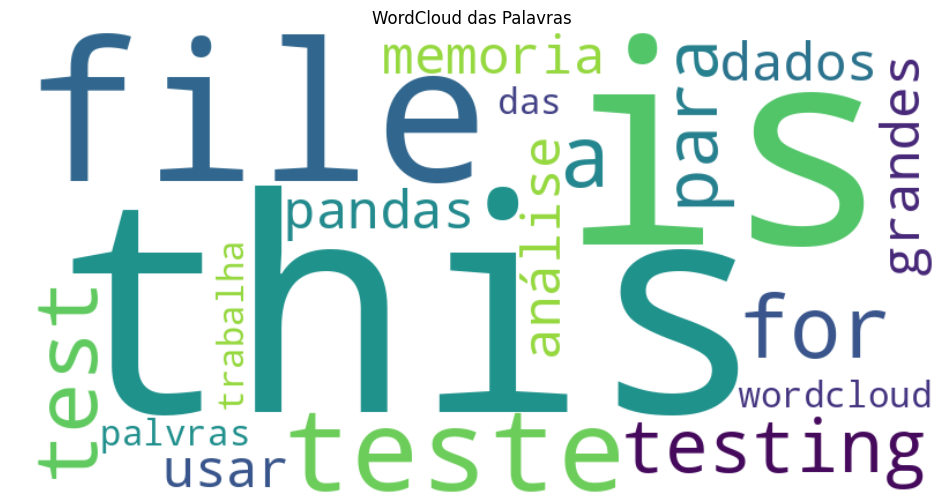

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

df = pd.read_csv('resultado.csv', header=None, names=['palavra', 'quantidade'], index_col=0)
df = df.reset_index()

df['quantidade'] = pd.to_numeric(df['quantidade'], errors='coerce').fillna(0).astype(int)

word_freq = dict(zip(df['palavra'], df['quantidade']))
wc = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(word_freq)
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud das Palavras')
plt.show()

Top 10 palavras mais frequentes:
    palavra  quantidade
1      this           2
2        is           2
3      file           2
4     teste           2
5         a           1
6       for           1
7      test           1
8   testing           1
9      para           1
10  memoria           1


/tmp/ipython-input-515260416.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quantidade', y='palavra', data=top10, palette='viridis')


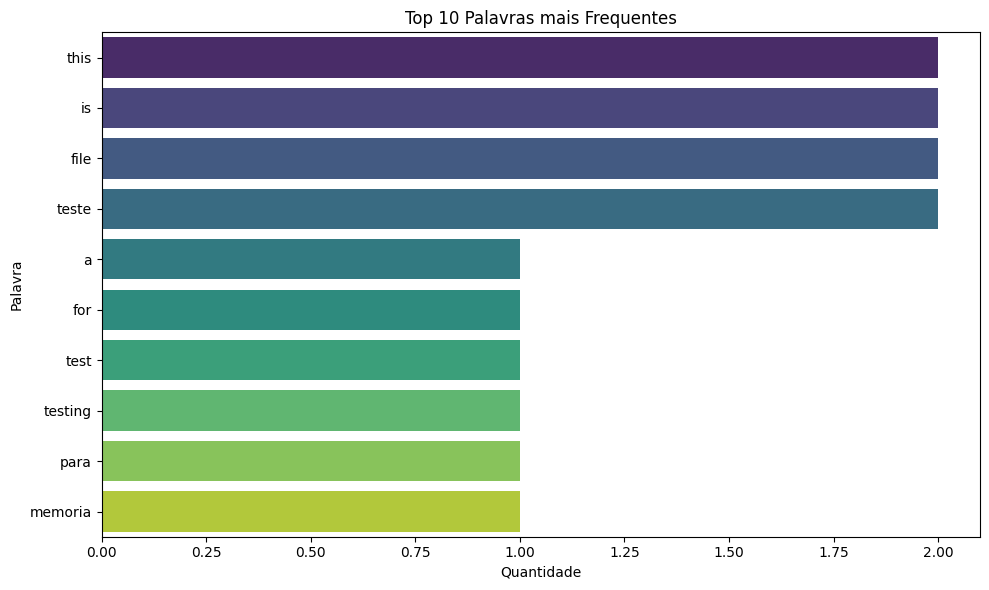

In [25]:
top10 = df.nlargest(10, 'quantidade')
print("Top 10 palavras mais frequentes:")
print(top10)

plt.figure(figsize=(10,6))
sns.barplot(x='quantidade', y='palavra', data=top10, palette='viridis')
plt.title('Top 10 Palavras mais Frequentes')
plt.xlabel('Quantidade')
plt.ylabel('Palavra')
plt.tight_layout()
plt.show()